In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)
y.shape

(200, 1)

Use `least_squares` to compute w, and visualize the results.

In [3]:
def compute_mse(y, tx, w):
    """compute the loss by mse."""
    e = y - tx.dot(w)
    mse = e.T @ e / (2 * len(e))
    return mse

[0.04396743]


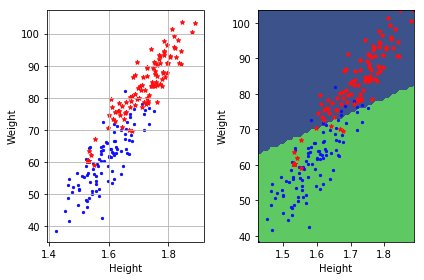

In [4]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = least_squares(y, tx)
    
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")

    print(compute_mse(y, tx, w)[0])
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [5]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return 1/(1+np.exp(-t))

In [6]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    return (np.log(1+np.exp(tx @ w)).sum()- y.T @ tx @ w).squeeze()

In [7]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    return tx.T @ (sigmoid(tx @ w) - y)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [8]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    loss= calculate_loss(y, tx, w)
    gradient= calculate_gradient(y, tx, w)
    w= w - gamma*gradient
    
    return loss, w

Demo!

[[ 0.02      ]
 [-0.68746037]
 [-0.79613021]]
Current iteration=0, loss=138.62943611198904
[[ 0.03064882]
 [-0.83441089]
 [-1.04691401]]
[[ 0.03788797]
 [-0.91064173]
 [-1.22389839]]
[[ 0.04329915]
 [-0.95334013]
 [-1.36491871]]
[[ 0.04758014]
 [-0.97618317]
 [-1.48398877]]
[[ 0.05110642]
 [-0.98591609]
 [-1.58806226]]
[[ 0.05410332]
 [-0.98641333]
 [-1.68115682]]
[[ 0.05671571]
 [-0.9801238 ]
 [-1.76582678]]
[[ 0.05904128]
 [-0.96870101]
 [-1.84380741]]
[[ 0.0611482 ]
 [-0.95331684]
 [-1.91633646]]
[[ 0.06308532]
 [-0.93483294]
 [-1.98433054]]
[[ 0.06488836]
 [-0.91390154]
 [-2.04848877]]
[[ 0.06658387]
 [-0.89102784]
 [-2.10935742]]
[[ 0.06819185]
 [-0.86661058]
 [-2.16737177]]
[[ 0.06972755]
 [-0.84096938]
 [-2.22288454]]
[[ 0.07120275]
 [-0.81436368]
 [-2.27618555]]
[[ 0.07262657]
 [-0.7870063 ]
 [-2.32751584]]
[[ 0.07400619]
 [-0.75907336]
 [-2.37707797]]
[[ 0.07534731]
 [-0.73071159]
 [-2.42504373]]
[[ 0.07665445]
 [-0.70204401]
 [-2.47155998]]
[[ 0.07793128]
 [-0.67317416]
 [-2.

 [-6.66623238]]
[[ 0.22486417]
 [ 2.26144637]
 [-6.66786756]]
[[ 0.22493102]
 [ 2.26245845]
 [-6.66949423]]
[[ 0.22499752]
 [ 2.2634652 ]
 [-6.67111246]]
[[ 0.22506369]
 [ 2.26446665]
 [-6.67272229]]
[[ 0.22512951]
 [ 2.26546284]
 [-6.67432376]]
[[ 0.225195  ]
 [ 2.26645378]
 [-6.67591692]]
[[ 0.22526015]
 [ 2.26743952]
 [-6.67750182]]
[[ 0.22532497]
 [ 2.26842008]
 [-6.67907851]]
[[ 0.22538946]
 [ 2.2693955 ]
 [-6.68064703]]
[[ 0.22545362]
 [ 2.27036579]
 [-6.68220743]]
[[ 0.22551745]
 [ 2.271331  ]
 [-6.68375975]]
[[ 0.22558096]
 [ 2.27229115]
 [-6.68530404]]
[[ 0.22564414]
 [ 2.27324627]
 [-6.68684034]]
[[ 0.225707  ]
 [ 2.27419638]
 [-6.6883687 ]]
[[ 0.22576954]
 [ 2.27514153]
 [-6.68988916]]
[[ 0.22583175]
 [ 2.27608173]
 [-6.69140177]]
[[ 0.22589366]
 [ 2.27701701]
 [-6.69290657]]
[[ 0.22595524]
 [ 2.2779474 ]
 [-6.6944036 ]]
[[ 0.22601651]
 [ 2.27887294]
 [-6.69589291]]
[[ 0.22607748]
 [ 2.27979364]
 [-6.69737454]]
[[ 0.22613812]
 [ 2.28070953]
 [-6.69884853]]
[[ 0.22619847]
 [ 

 [-6.95737638]]
[[ 0.23684076]
 [ 2.44057157]
 [-6.95755688]]
[[ 0.23684823]
 [ 2.44068198]
 [-6.95773651]]
[[ 0.23685567]
 [ 2.44079185]
 [-6.95791528]]
[[ 0.23686307]
 [ 2.44090119]
 [-6.9580932 ]]
[[ 0.23687043]
 [ 2.44101   ]
 [-6.95827026]]
[[ 0.23687776]
 [ 2.4411183 ]
 [-6.95844647]]
[[ 0.23688505]
 [ 2.44122607]
 [-6.95862183]]
[[ 0.23689231]
 [ 2.44133333]
 [-6.95879635]]
[[ 0.23689953]
 [ 2.44144007]
 [-6.95897004]]
[[ 0.23690672]
 [ 2.44154629]
 [-6.95914289]]
[[ 0.23691387]
 [ 2.44165201]
 [-6.95931491]]
[[ 0.23692099]
 [ 2.44175722]
 [-6.95948611]]
[[ 0.23692808]
 [ 2.44186192]
 [-6.95965649]]
[[ 0.23693513]
 [ 2.44196612]
 [-6.95982604]]
[[ 0.23694215]
 [ 2.44206982]
 [-6.95999479]]
[[ 0.23694913]
 [ 2.44217302]
 [-6.96016272]]
[[ 0.23695608]
 [ 2.44227572]
 [-6.96032985]]
[[ 0.236963  ]
 [ 2.44237793]
 [-6.96049618]]
[[ 0.23696989]
 [ 2.44247966]
 [-6.96066171]]
[[ 0.23697674]
 [ 2.44258089]
 [-6.96082645]]
[[ 0.23698356]
 [ 2.44268163]
 [-6.96099039]]
[[ 0.23699034]
 [ 

[[ 0.23826863]
 [ 2.46164554]
 [-6.99187026]]
[[ 0.23826929]
 [ 2.46165517]
 [-6.99188594]]
[[ 0.23826994]
 [ 2.46166475]
 [-6.99190155]]
[[ 0.23827058]
 [ 2.46167428]
 [-6.99191708]]
[[ 0.23827123]
 [ 2.46168377]
 [-6.99193254]]
[[ 0.23827187]
 [ 2.46169321]
 [-6.99194792]]
[[ 0.2382725 ]
 [ 2.46170261]
 [-6.99196324]]
[[ 0.23827314]
 [ 2.46171196]
 [-6.99197847]]
[[ 0.23827377]
 [ 2.46172127]
 [-6.99199364]]
[[ 0.2382744 ]
 [ 2.46173053]
 [-6.99200874]]
[[ 0.23827502]
 [ 2.46173975]
 [-6.99202376]]
[[ 0.23827565]
 [ 2.46174893]
 [-6.99203871]]
[[ 0.23827627]
 [ 2.46175806]
 [-6.99205359]]
[[ 0.23827688]
 [ 2.46176715]
 [-6.9920684 ]]
[[ 0.2382775 ]
 [ 2.4617762 ]
 [-6.99208314]]
[[ 0.23827811]
 [ 2.4617852 ]
 [-6.99209781]]
[[ 0.23827872]
 [ 2.46179416]
 [-6.99211241]]
[[ 0.23827932]
 [ 2.46180308]
 [-6.99212694]]
[[ 0.23827992]
 [ 2.46181195]
 [-6.9921414 ]]
[[ 0.23828052]
 [ 2.46182079]
 [-6.99215579]]
[[ 0.23828112]
 [ 2.46182958]
 [-6.99217012]]
[[ 0.23828171]
 [ 2.46183833]
 [-6

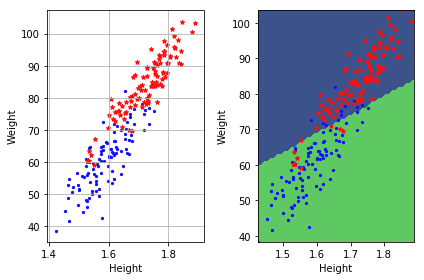

In [9]:
def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [153]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    return tx.T @ np.diag((sigmoid(tx @ w)*(1-sigmoid(tx @ w))).squeeze()) @ tx

Write a function below to return loss, gradient, and hessian.

In [154]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    loss= calculate_loss(y, tx, w)
    gradient= calculate_gradient(y, tx, w)
    hessian= calculate_hessian(y, tx, w)
    return loss,gradient,hessian

### Using Newton's method
Use Newton's method for logistic regression.

In [164]:
def learning_by_newton_method(y, tx, w):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    loss,gradient,hessian=logistic_regression(y, tx, w)
    
    w= w- np.linalg.solve(hessian, gradient)
    return loss, w

demo

Current iteration=0, the loss=138.62943611198904
Current iteration=1, the loss=63.41155373909584
Current iteration=2, the loss=47.304586199350666
Current iteration=3, the loss=41.99746742248459
Current iteration=4, the loss=40.95639863723807
Current iteration=5, the loss=40.89511993648955
Current iteration=6, the loss=40.894825617627134
Current iteration=7, the loss=40.894825609890574
loss=40.894825609890745


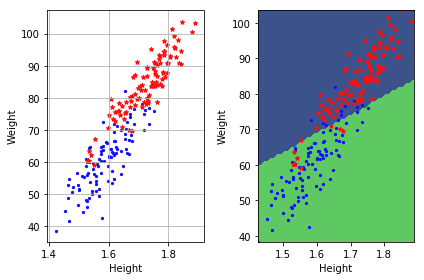

In [165]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [166]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    loss= calculate_loss(y,tx,w)+ lambda_/2 * np.linalg.norm(w)
    gradient= calculate_gradient(y,tx,w)+ 2* lambda_*w
    hessian= calculate_hessian(y,tx,w)
    return loss, gradient,hessian

In [167]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    loss, gradient,hessian=penalized_logistic_regression(y, tx, w, lambda_)

    w=w-gamma*gradient

    return loss, w

Current iteration=0, loss=138.62943611198904
Current iteration=100, loss=44.41540981977445
Current iteration=200, loss=42.711340508338736
Current iteration=300, loss=42.29837065072067
Current iteration=400, loss=42.16520152841303
Current iteration=500, loss=42.1172058381972
Current iteration=600, loss=42.09913388942217
Current iteration=700, loss=42.09221194762616
Current iteration=800, loss=42.08954303504813
Current iteration=900, loss=42.088511322209804
Current iteration=1000, loss=42.08811209835391
Current iteration=1100, loss=42.08795755800377
Current iteration=1200, loss=42.08789772617749
Current iteration=1300, loss=42.087874560352
Current iteration=1400, loss=42.08786559075275
Current iteration=1500, loss=42.08786211777455
loss=41.80475480585358
w= [ 0.17577628  1.52707625 -5.44947509]


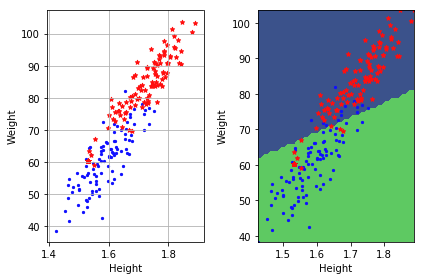

In [168]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    print("w=",w.squeeze())
logistic_regression_penalized_gradient_descent_demo(y, x)